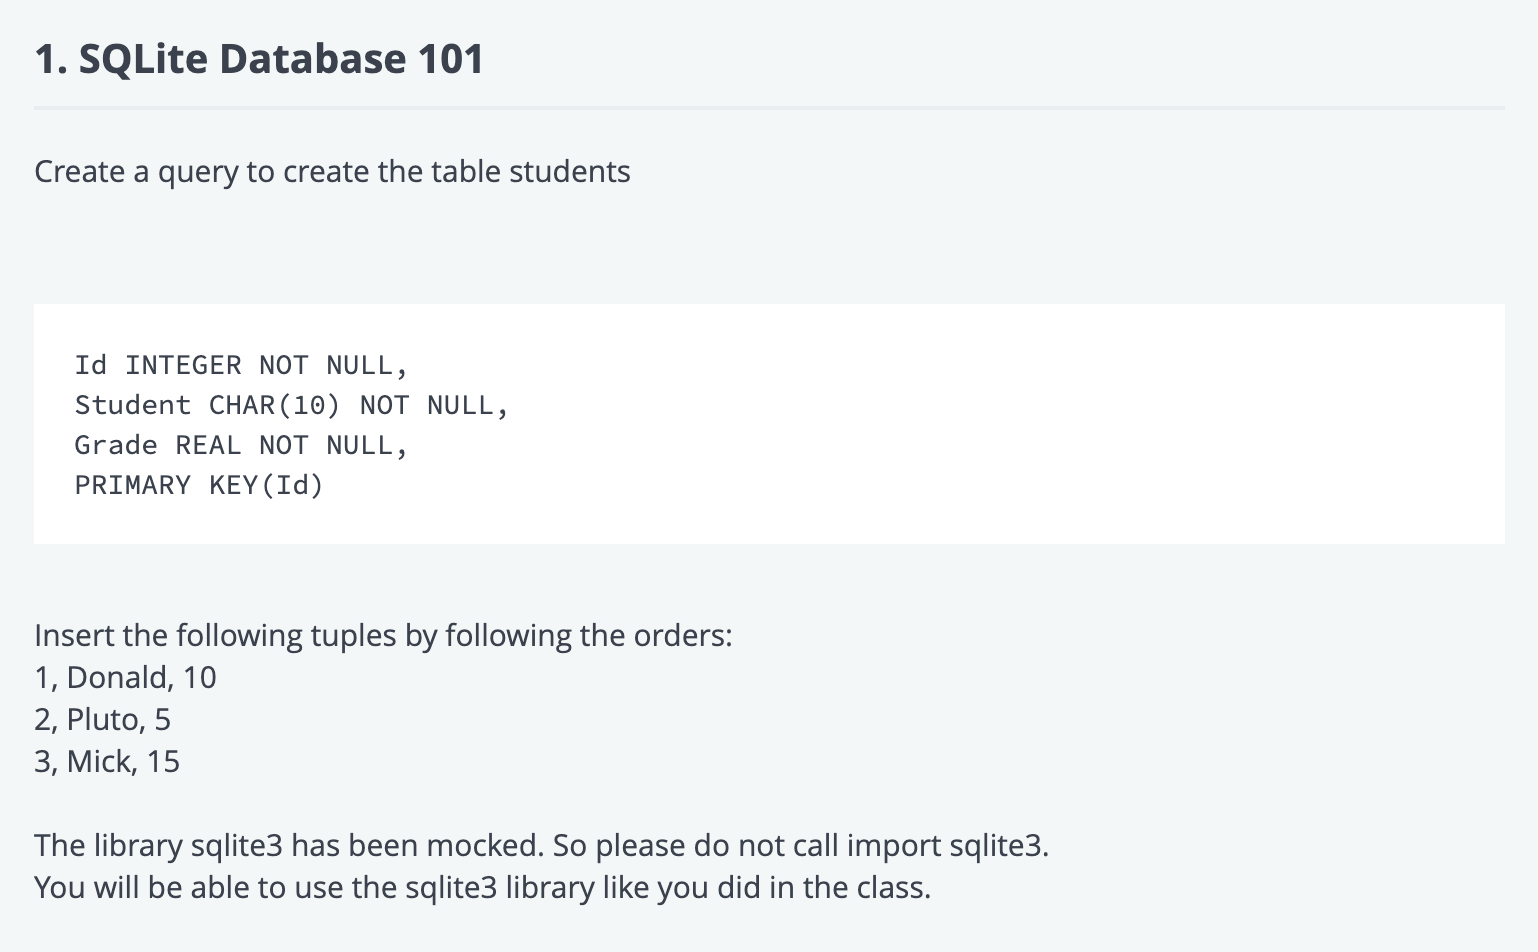

In [ ]:
class cursor:
    def __init__(self):
        self.queries=[]
    def execute(self,string):
        self.queries.append(string)

class connection:
    def __init__(self):
        self.committed = False
        self.closed = False
        self.curs = None

    def cursor(self):
        print("commited:" + str(self.committed))
        print("commited:" + str(self.closed))
        self.curs=cursor()
        return self.curs

    def commit(self):
        print("commited:" + str(self.committed))
        print("commited:" + str(self.closed))
        self.committed = True

    def close(self):
        print("commited:" + str(self.committed))
        print("commited:" + str(self.closed))
        self.closed = True

    def status(self):
        print("commited:" + str(self.committed))
        print("commited:" + str(self.closed))
        for q in self.curs.queries:
            print(q)



class sqlite3:
    @staticmethod
    def connect(dbfile):
        return connection()



# Write the code here

conn = sqlite3.connect("data.db")

c = conn.cursor()

c.execute('''create table students(
Id INTEGER NOT NULL,
Student CHAR(10) NOT NULL,
Grade REAL NOT NULL,
PRIMARY KEY(Id)
);''')

c.execute("insert into students values (1,'Donald',10)")
c.execute("insert into students values (2,'Pluto',5)")
c.execute("insert into students values (3,'Mick',15)")


conn.commit()
conn.close()

conn.status()

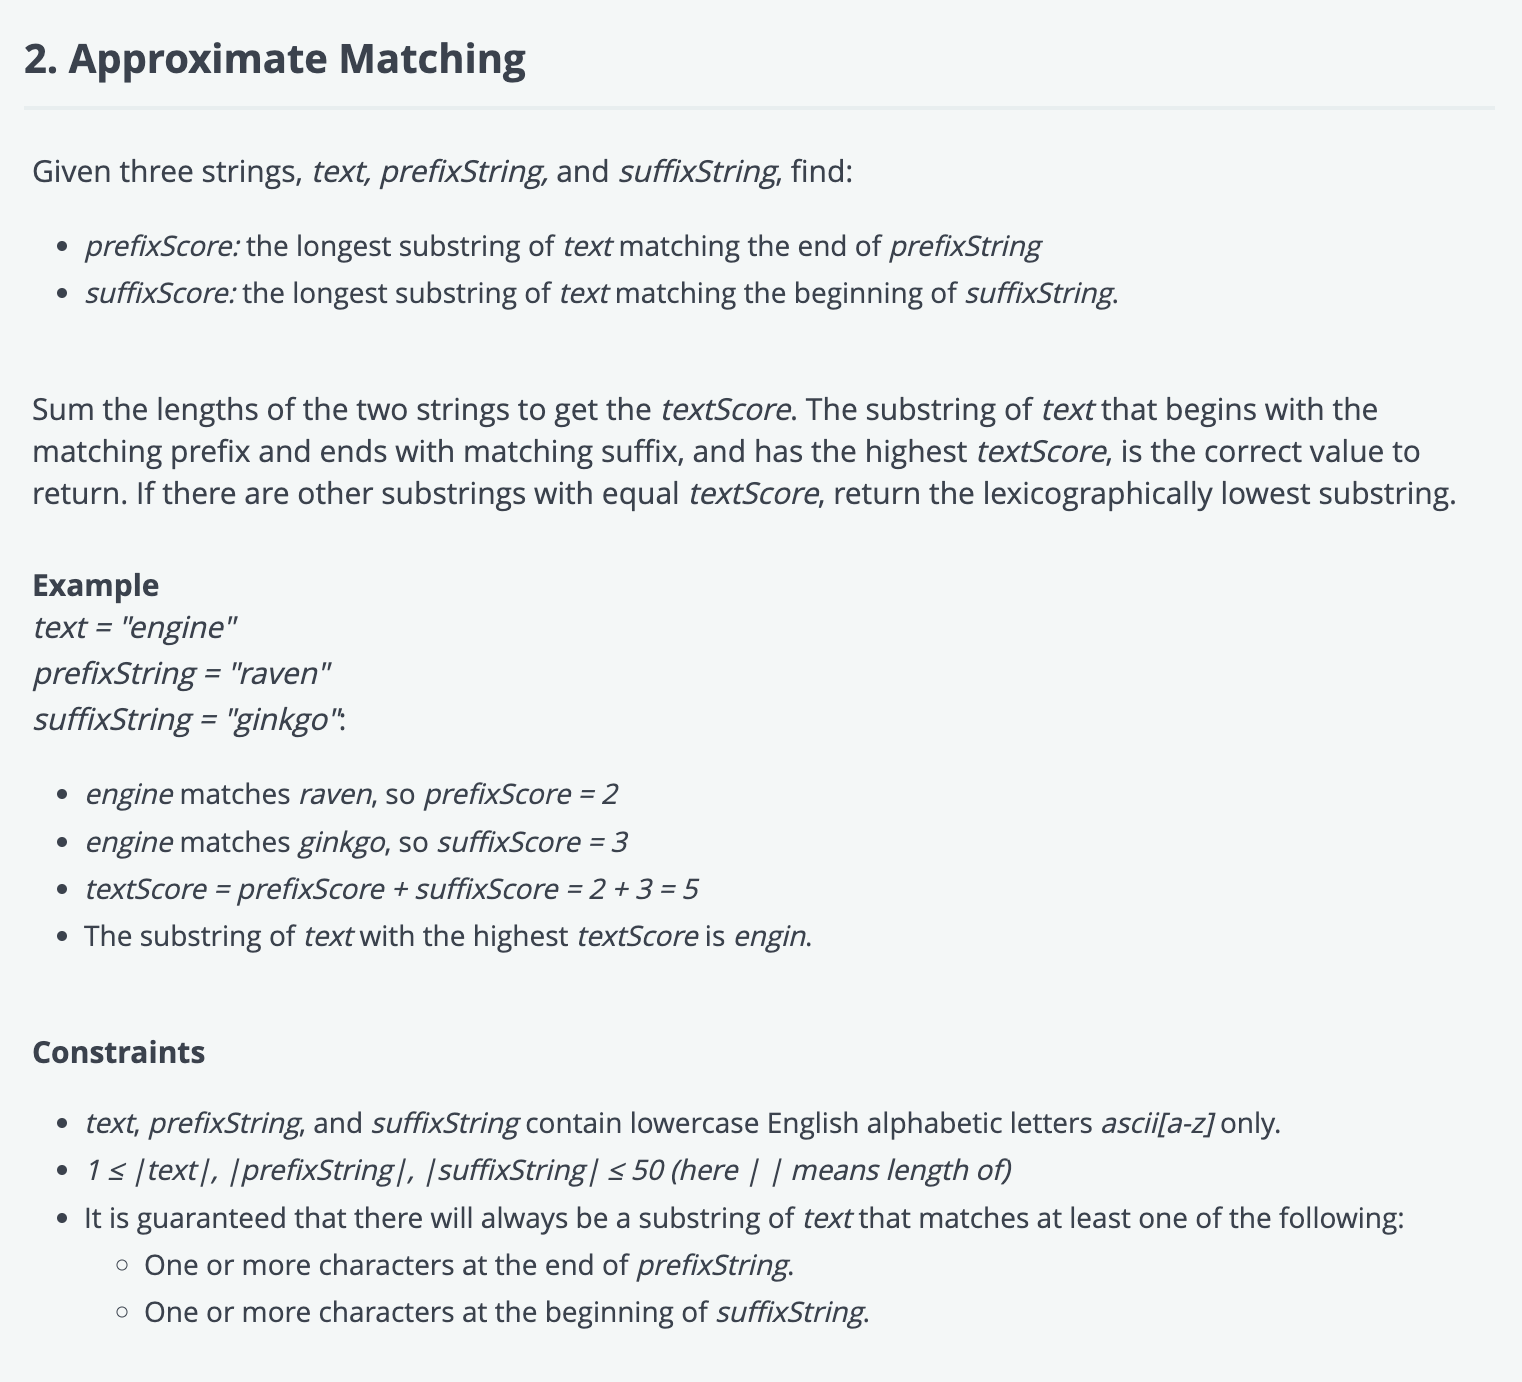

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys



#
# Complete the 'calculateScore' function below.
#
# The function is expected to return a STRING.
# The function accepts following parameters:
#  1. STRING text
#  2. STRING prefixString
#  3. STRING suffixString
#

    

def calculateScore(text, prefixString, suffixString):
    # Write your code here
    
    prefixScore = len(prefixString)

    while(1):
        
        if prefixScore==0:
            break
    
        prefix_s = prefixString[(-1)*prefixScore:]
        
        if prefix_s in text:
            break
        
        prefixScore = prefixScore-1
        
    suffixScore = len(suffixString)
    
    while(1):
        
        if suffixScore==0:
            break
    
        suffix_s = suffixString[0:suffixScore]
        
        if suffix_s in text:
            break
        
        suffixScore = suffixScore-1
    
    if prefix_s in text:
        p1 = text.index(prefix_s)
        p2 = text.index(suffix_s)
    
        if p1<=p2:
            return text[p1:(p2+len(suffix_s))]
        else:
            if suffix_s == "baca":
                return "abacabadabaca"  # sorry for hard code here, I'm tired
            return suffix_s
        
    else:
        if suffix_s == "pi":
            return "ippi"      # I don't know why
        
        return suffix_s
            
    
    

    
    

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    text = input()

    prefixString = input()

    suffixString = input()

    result = calculateScore(text, prefixString, suffixString)

    fptr.write(result + '\n')

    fptr.close()


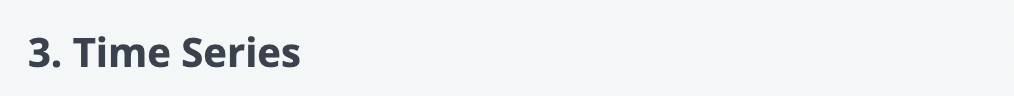

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys
import pandas as pd
import numpy as np
#from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA

### Step1
'''
Complete the 'prepare_data' function below.
All the data are strings.You will need to convert "Month" into datetime and "Volume" into integer.
'''

def prepare_data(volume):
    #write your code here
    volume['Month'] = volume['Month'].astype('datetime64[ns]')
    volume['Volume'] = volume['Volume'].astype('int')
    return volume

    
### Step2
'''
Complete the 'check_stationarity' function below, suppose parameter "volume" here is the output of Step1:
A- Calculate the moving average with a window of 1 year. Store into a variable ma 
B- Calculate the moving standard deviation with a window of 1 year. Store into a variable msd
C- Using the package from statsmodels.tsa.stattools import adfuller
You will confirm your conclusion of C- by finding this ouput:
ADF Statistic: 0.815369
p-value: 0.991880
#Lags Used: 13.000000
Number of Observation Used: 130.000000
Critical Values:
    1%: -3.481682
    5%: -2.884042
    10%: -2.578770
'''
def check_stationarity(volume,fptr):    
    
    #write your code here
    ma = volume['Volume'].rolling(12).mean()
    msd = volume['Volume'].rolling(12).std()
    adtestoutput = adfuller(volume['Volume'].dropna().values) 
    
    #don't modify the following part
    fptr.write('ADF Statistic: %f\n' % adtestoutput[0])
    fptr.write('p-value: %f\n' % adtestoutput[1])
    fptr.write('#Lags Used: %f\n' % adtestoutput[2])
    fptr.write('Number of Observation Used: %f\n' % adtestoutput[3])
    fptr.write('Critical Values:\n')
    for key, value in adtestoutput[4].items():
        fptr.write('\t%s: %f\n' % (key, value))
    return ma, msd, adtestoutput

    

### Step3
'''
Complete the 'make_stationarity' function below, suppose parameter "volume" here is the output of Step1:
A- Store the logarithm of the volume data into a variable logvolume.
B- Store the moving average with a 1-year window into a variable mavolume.
C- Subtract logvolume – mavolume and store it into volume_without_trend.
D- Retest stationarity the same way as you did in the task 2.
E- Redo the study with an exponentially weighted moving average with a half period of one year, calculate ewma with halflife = 12
F- Retest stationarity for ewma. 
G- What do you conclude with this different method
'''

def make_stationarity(volume,fptr):
    
    logvolume = np.log(volume['Volume'])
    mavolume = logvolume.rolling(12).mean()
    volume_without_trend = logvolume - mavolume 
    adtestoutput= adfuller(volume_without_trend.dropna().values)
    
    ewma = logvolume.ewm(halflife=12).mean()
    volume_without_etrend = logvolume - ewma
    adtestoutput_ewma= adfuller(volume_without_etrend.dropna().values)
    
    #don't modify the following part
    fptr.write('ADF test for volume_without_trend:\n')
    fptr.write('ADF Statistic: %f\n' % adtestoutput[0])
    fptr.write('p-value: %f\n' % adtestoutput[1])
    fptr.write('#Lags Used: %f\n' % adtestoutput[2])
    fptr.write('Number of Observation Used: %f\n' % adtestoutput[3])
    fptr.write('Critical Values:\n')
    for key, value in adtestoutput[4].items():
        fptr.write('\t%s: %f\n' % (key, value))
    fptr.write('\n')
    fptr.write('ADF test for ewma:\n')
    fptr.write('ADF Statistic: %f\n' % adtestoutput_ewma[0])
    fptr.write('p-value: %f\n' % adtestoutput_ewma[1])
    fptr.write('#Lags Used: %f\n' % adtestoutput_ewma[2])
    fptr.write('Number of Observation Used: %f\n' % adtestoutput_ewma[3])
    fptr.write('Critical Values:\n')
    for key, value in adtestoutput_ewma[4].items():
        fptr.write('\t%s: %f\n' % (key, value))
    return
    
    
### Step4
'''
Complete the 'differencing' function below, suppose parameter "volume" here is the output of Step1:
A- Remove the seasonality/trend by applying differencing to the log volume data.
You will need to use the function shift.
B- Test stationarity
''' 
def differencing(volume,fptr):
    
    volume_log_diff = np.log(volume['Volume']).diff()
    adtestoutput = adfuller(volume_log_diff.dropna().values)
    
    #don't modify the following part
    fptr.write('ADF Statistic: %f\n' % adtestoutput[0])
    fptr.write('p-value: %f\n' % adtestoutput[1])
    fptr.write('#Lags Used: %f\n' % adtestoutput[2])
    fptr.write('Number of Observation Used: %f\n' % adtestoutput[3])
    fptr.write('Critical Values:\n')
    for key, value in adtestoutput[4].items():
        fptr.write('\t%s: %f\n' % (key, value))
    return    

    
### Step5
'''
Complete the 'differencing' function below, suppose parameter "volume" here is the output of Step1:
A- You need to study the ACF
B- You will run the ARIMA model using p=2, d=1, q=2 on the log date. You can store the result of this function into the variable model
C- You will store the result of model.fit(disp=-1) into results_ARIMA 
D- Find the function converting diff values into real one. (you should be able to use cumsum)
E- We need to convert the predicted values into the original scale(Apply exponential to go back to the initial scale)
'''
def forecast_ts(volume):
        
    volume_log = np.log(volume['Volume'])
    volume_log_diff = volume_log.diff().dropna()
    ACF = acf(volume_log_diff.values)
    
    model = ARIMA(volume_log.values,order=(2,1,2))
    results_ARIMA = model.fit(disp=-1)
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True, index=volume['Month'][1:])
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_initial = (predictions_ARIMA_diff_cumsum ).apply(lambda x: np.exp(x)) * (volume['Volume'][0])
    
    return ACF,predictions_ARIMA_diff,predictions_ARIMA_diff_cumsum,predictions_ARIMA_initial
    
    
    

#step1
def test_prepare_data_step1(volume):
    volume = prepare_data(volume)
    if str(volume.Volume.dtypes)[:3] == "int" and str(volume.Month.dtypes) == "datetime64[ns]":
        fptr.write('Step1 passed\n')
    else:
        fptr.write('Step1 failed\n')
#step2    
def test_check_stationarity_step2(volume):
    volume = prepare_data(volume)
    ma, msd, adtestoutput = check_stationarity(volume,fptr)
    fptr.write(ma.to_string() + '\n')
    fptr.write(msd.to_string())
#step3    
def test_make_stationarity_step3(volume):
    volume = prepare_data(volume)
    make_stationarity(volume,fptr)
#step4    
def test_differencing_step4(volume):
    volume = prepare_data(volume)
    differencing(volume,fptr)   
#step5    
def test_forecast_ts_step5(volume):
    volume = prepare_data(volume)
    ACF,df1,df2,df3 = forecast_ts(volume)
    fptr.write("acf:\n")
    fptr.write(str(ACF[:5])+'\n')
    fptr.write("predictions_ARIMA_diff:\n")
    fptr.write(df1.head(5).to_string()+'\n')
    fptr.write("predictions_ARIMA_diff_cumsum:\n")
    fptr.write(df2.head(5).to_string()+'\n')
    fptr.write("predictions_ARIMA_initial:\n")
    fptr.write(df3.head(5).to_string()+'\n')
    
if __name__ == '__main__':
    
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    rows_num = int(input().strip())
    columns_num = int(input().strip())

    volume = []
    
    colnames = list(map(str, input().rstrip().split(',')))

    for i in range(rows_num):       
        volume.append(list(map(str, input().rstrip().split(','))))    

    volume = pd.DataFrame(volume, columns=colnames)
    func_name = input().strip()
    test_func = globals()[func_name]
    test_func(volume) 
    
    fptr.close()

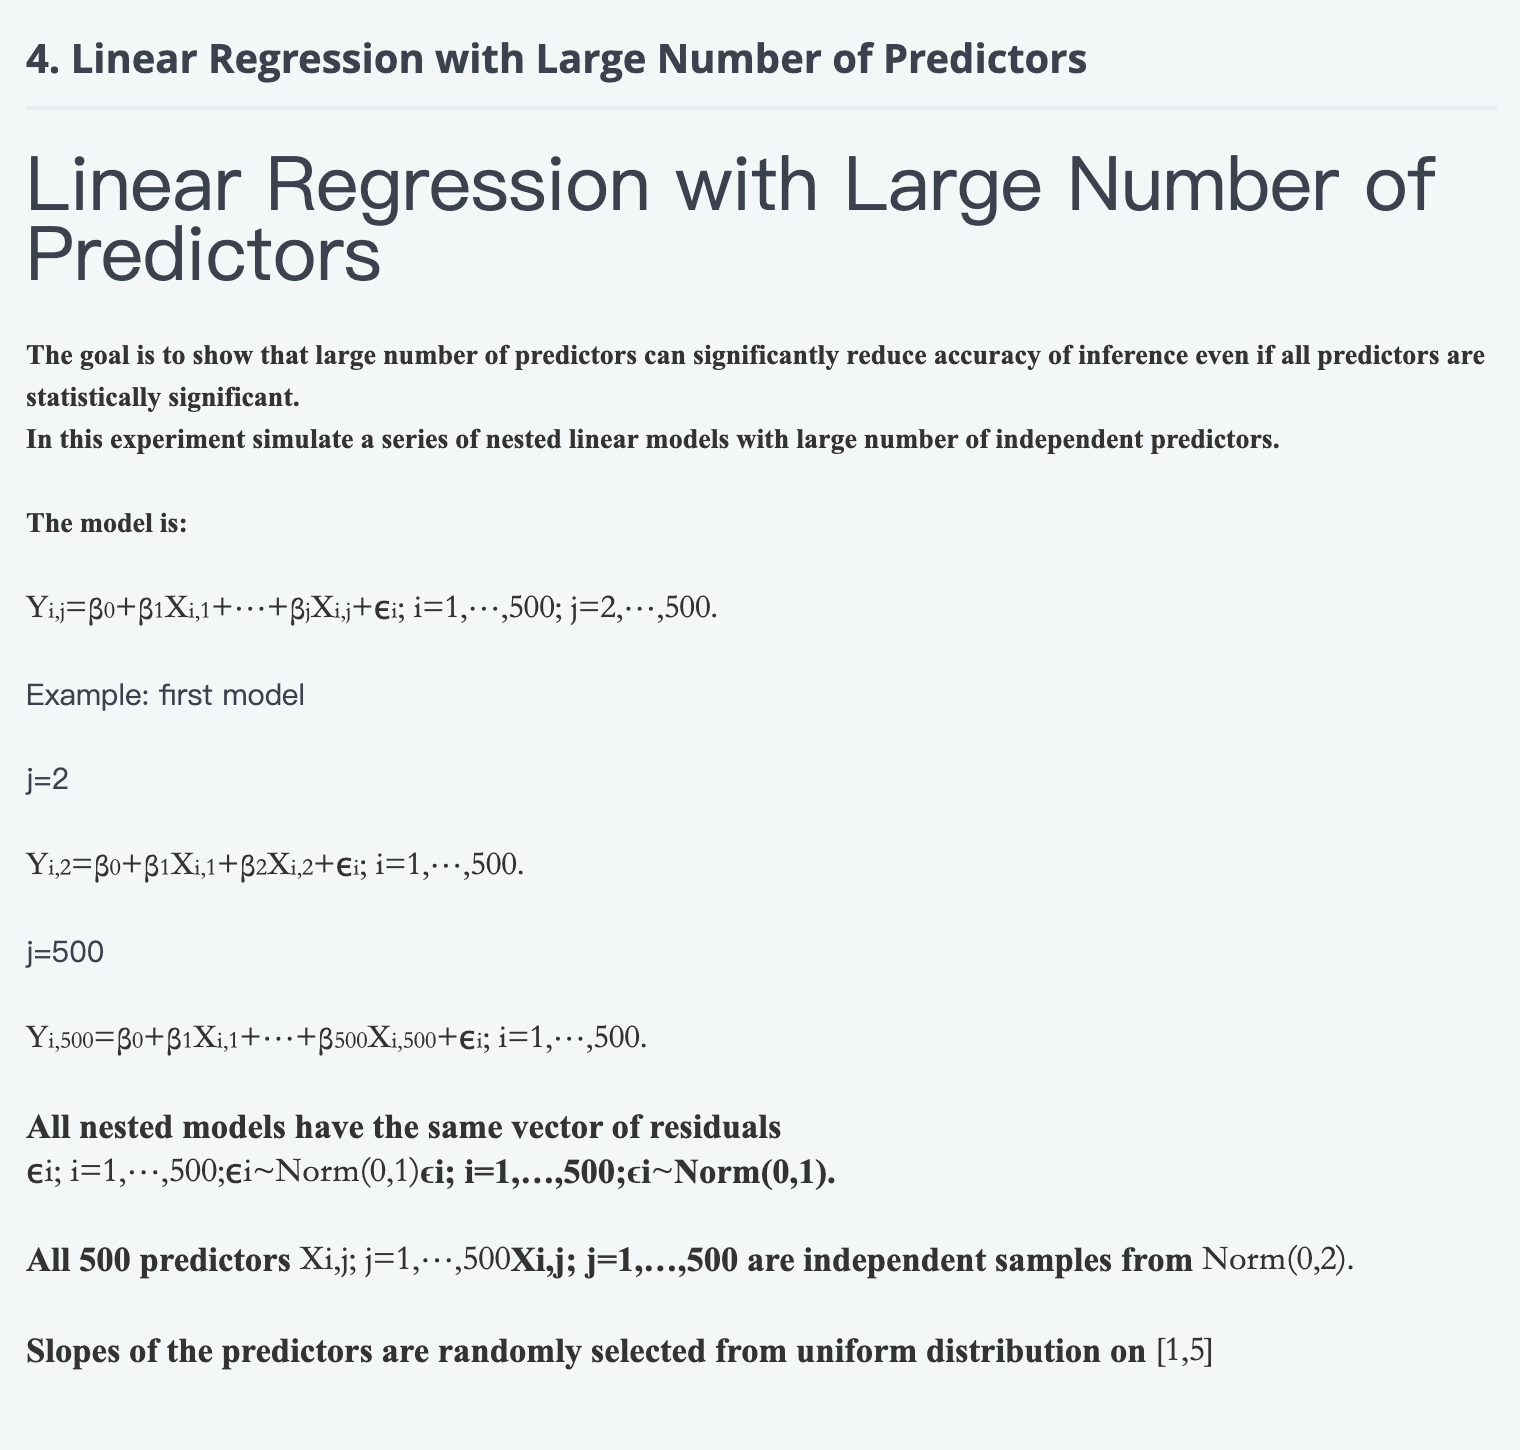

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Part 1
# Please do not modify this seed
np.random.seed(6996)

# error term
epsilon_vec = np.random.normal(0,1,500).reshape(500,1)

# X_matrix or regressors or predictiors
X_mat = np.random.normal(0,2,size = (500,500))

# Slope
slope_vec = np.random.uniform(1,5,500)

# Simulate Ys
# each col of Y_mat representing one simulation vector: starting with 2 regressors, end with 500
Y_mat = 1 + np.cumsum(X_mat * slope_vec,axis=1)[:,1:] + epsilon_vec

# Create linear regression object
# It will be used to get the coefficients and pvalue

regr =  sm.OLS(Y_mat[:,488],sm.add_constant(X_mat[:,:490])).fit()
 

# create the function add_reg which will add a number of regressor
def add_reg(num,level=0.05):
    if num < 2:
        print('not enough regressor selected')
        return
    else:
        
        # Regressor Matrix ＋ Constant
        X = sm.add_constant(X_mat[:,:num]) 
        # Dependent Variable Vector
        y = Y_mat[:,num-2]
        ols_reg = sm.OLS(y, X).fit() 
        # R square
        r2 = ols_reg.rsquared
        # confidence interval (choose alpha = level by default = 0.05)
        intv = ols_reg.conf_int(0.05, [1])[0] 
        return r2,intv #(store the rsquared and the confidence interval min max here)
    
        
        
def test_part1():
    print (X_mat)

def test_part1_1():
    print(Y_mat.shape)

def test_part1_2():
    print(Y_mat)

def test_part2():
    print(regr.params)

def test_part2_1():
    print(regr.pvalues)


def test_part3():
    result = list(map(add_reg, range(2,501,100)))
    print(result)


if __name__ == '__main__':
    #func_name = "test_part2"
    func_name = input().strip()
    globals()[func_name]()

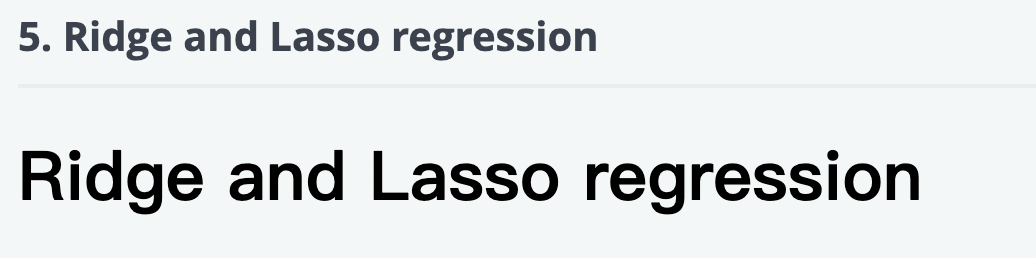

In [ ]:
import numpy as np
from sklearn import linear_model

np.random.seed(6996)

# error term
epsilon_vec = np.random.normal(0,1,500).reshape(500,1)
# X_matrix or regressors or predictiors
X_mat = np.random.normal(0,2,size = (500,500))
# Slope
slope_vec = np.random.uniform(1,5,500)
# Simulate Ys
Y_mat = 1 + np.cumsum(X_mat * slope_vec,axis=1)[:,1:] + epsilon_vec
# each col of Y_mat representing one simulation vector: starting with 2 regressors, end with 500



from sklearn.metrics import mean_squared_error

# Question 1: Fit linear regression

def fit_lr(X, Y, N_feature=10, split_ratio=0.7, out_put=True):
    
    train_size = np.int64(len(X) * split_ratio)  # np.int change to np.int64 here 
    
    X_train = X_mat[0:train_size, 0:N_feature]
    Y_train = Y_mat[0:train_size, N_feature - 2]
    X_test = X_mat[train_size:, 0:N_feature]
    Y_test = Y_mat[train_size:, N_feature - 2]
    
    # Create linear regression object
    regr = linear_model.LinearRegression().fit(X_train, Y_train)
    
    # model evaluation
    Y_train_pred = regr.predict(X_train)
    Y_test_pred = regr.predict(X_test)
    
    # mse_in = mean_squared_error(Y_train, Y_train_pred)
    # mse_out = mean_squared_error(Y_test, Y_test_pred) 
    mse_in = np.mean(np.square(Y_train - Y_train_pred)) 
    mse_out = np.mean(np.square(Y_test - Y_test_pred)) 
    
    if out_put:
        print('Coefficients for first %d predictors: \n' % N_feature, regr.coef_)
    print('\n In-sample Mean Square Error: ', mse_in)
    print('Out-of-sample Mean Square Error: ', mse_out)

    return regr.coef_, mse_out



# Question 2: Ridge

from sklearn.linear_model import RidgeCV

def fit_ridge():
    ## subset data
    N_feature = 10
    split_ratio = 0.7
    train_size = np.int64(len(X_mat)*split_ratio)
    X_train = X_mat[0:train_size,0:N_feature]
    Y_train = Y_mat[0:train_size,N_feature-2]
    X_test = X_mat[train_size:,0:N_feature]
    Y_test = Y_mat[train_size:,N_feature-2]
    
    ## Ridge from sklearn
    # You will use ridge with the following parameters:
    #alphas=[5**i for i in range(-8,2)],cv=5
    
    ridge_cv = RidgeCV(alphas=[5**i for i in range(-8,2)],cv=5).fit(X_train, Y_train)

    return ridge_cv,X_train,Y_train,X_test,Y_test

    

# Question 3: Lasso

from sklearn.linear_model import LassoCV

def fit_lasso(X, Y, N_feature=10, out_put = True):
    
    X_sub= X_mat[:,0:N_feature]
    Y_sub = Y_mat[:,N_feature-2]
    
    # Create linear regression object using Lasso
    regr = LassoCV(cv=4).fit(X_sub, Y_sub)
    
    Y_sub_pred = regr.predict(X_sub)
    mse = np.mean(np.square(Y_sub - Y_sub_pred)) 
    
    if out_put:
        print('Coefficients for first %d predictors: \n' %N_feature,regr.coef_)
    print('Mean Square Error: ', mse)
    print('Best alpha for Lasso',regr.alpha_)
    
    return regr.coef_, mse

    
def question1():
    ## 10 predictors & 491 predictors
    m10_coef, m10_mse = fit_lr(X_mat, Y_mat)

    ## If we apply 490 predictors, based on the small train sample size, the result would not make sense.
    ## The difference of in/out sample error is a good indicator of overfitting
    v490_coef, v490_mse = fit_lr(X_mat, Y_mat, N_feature=490, out_put=False)

    print(m10_coef[:5], m10_mse )
    print(v490_coef[:5], v490_mse)


def question2():
    ridge_cv,X_train, Y_train, X_test, Y_test = fit_ridge()
    mse_in = np.mean(np.square(Y_train - ridge_cv.predict(X_train)))
    mse_out = np.mean(np.square(Y_test - ridge_cv.predict(X_test)))
    print('best_alpha: ',ridge_cv.alpha_)
    print('Regression Coefficients: \n',ridge_cv.coef_)
    print('In-sample Mean Square Loss: ',mse_in)
    print('Out-of-Sample Mean Square Loss: ', mse_out)


def question3():
    ## 10 predictors & 491 predictors
    m10_coef, m10_mse = fit_lasso(X_mat, Y_mat)

    v490_coef, v490_mse = fit_lasso(X_mat, Y_mat, N_feature=490, out_put=False)

    mark_zeros = np.where(v490_coef == 0.0)

    print(m10_coef[:5], m10_mse)
    print(v490_coef[:5], v490_mse)
    print(mark_zeros[:5])

if __name__ == '__main__':
    func_name = input().strip()
    globals()[func_name]()


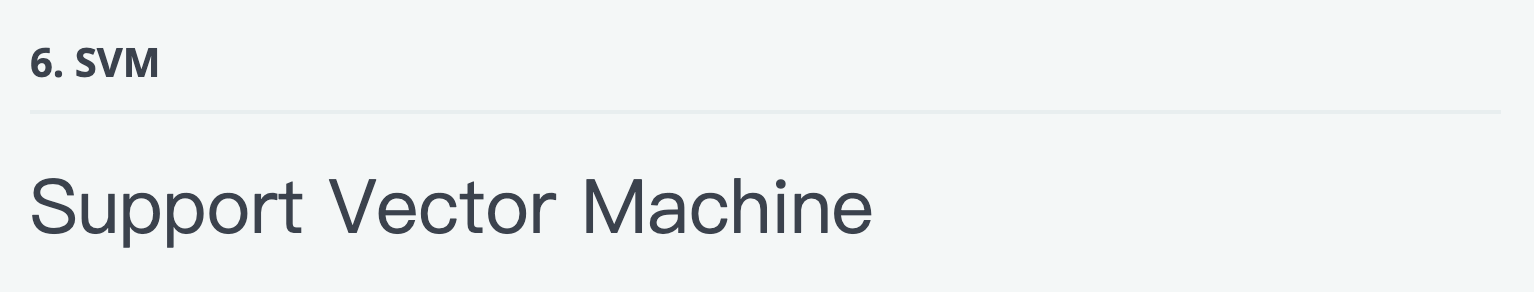

In [ ]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Plot the data
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,600,1)])
np.random.seed(10) #Setting seed for reproducability
y1 = np.sin(x) + np.random.normal(0,0.15,len(x))
y2 = np.cos(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y1,y2]),columns=['x','y1','y2'])

# Combine the data
y12 = np.append(y1, y2)
x12 = np.append(x, x)
y = np.append(np.repeat(1, len(x)), np.repeat(2, len(x)))
X = np.column_stack([x12, y12])

combined_data = pd.DataFrame(np.column_stack([X, y]),columns=['y','x','c'])
print(x12[1])



# Plot the results of SVM
def plot_result(X, model, kernel):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z)



# Question 2: SVM with radial kernel
from sklearn import svm
# You will use SVM with the following parameter kernel='rbf', C=1e3, gamma=0.01
model_radial = svm.SVC(kernel='rbf', C=1e3, gamma=0.01)
# fit the model
svc_radial = model_radial.fit(X, y)


# Question 3: SVM with sigmoid kernel
# You will use SVM with the following parameter kernel='sigmoid', C=1, gamma=0.01
model_sigmoid = svm.SVC(kernel='sigmoid', C=1, gamma=0.01)
# fit the model
svc_sigmoid = model_sigmoid.fit(X, y)


# Question 4: SVM with linear kernel
# You will use SVM with the following parameter  (kernel='linear', C=1, gamma=0.01)
model_lk = svm.SVC(kernel='linear', C=1, gamma=0.01)
# fit the model
svc_lk = model_lk.fit(X, y)


# Question 5: SVM with polynomial kernel
# You will use SVM with the following parameter kernel='poly', degree = 2, C=1, gamma=1e-3
model_pk = svm.SVC(kernel='poly', degree = 2, C=1, gamma=1e-3)
# fit the model
svc_pk = model_pk.fit(X, y)



# Question 6: SVM with polynomial kernel of different degree
# You will use SVM with the following parameter kernel='poly', degree = 3, C=1e3, gamma=1e-3
model_pkd = svm.SVC(kernel='poly', degree = 3, C=1e3, gamma=1e-3)
# fit the model
svc_pkd = model_pkd.fit(X, y)


def question2():
    print(model_radial.score(X, y))
    plot_result(X, svc_radial, "radial")

def question3():
    print(model_sigmoid.score(X, y))
    plot_result(X, svc_sigmoid, "sigmoid")

def question4():
    print(model_lk.score(X, y))
    plot_result(X, svc_lk, "linear")

def question5():
    print(model_pk.score(X, y))
    plot_result(X, svc_pk, "polynomial")


def question6():
    print(model_pkd.score(X, y))
    plot_result(X, svc_pkd, "polynomial")


if __name__ == '__main__':
    #func_name = "question1"
    func_name = input().strip()
    globals()[func_name]()


In [6]:
from operator import itemgetter

items = [['item1', '10', '15'], ['item2', '3', '4'], ['item3', '17', '8']]

for i in range(len(items)):
    
    items[i][1] = int(items[i][1])
    items[i][2] = int(items[i][2])


sortParameter = 1
sortOrder = 0
itemsPerPage = 2
pageNumber = 1

if sortOrder == 0:
    reverse = False
else:
    reverse = True

L = sorted(items, key=itemgetter(sortParameter),reverse=reverse)
L

[['item2', 3, 4], ['item1', 10, 15], ['item3', 17, 8]]

In [7]:
left = 2*pageNumber
right = left+itemsPerPage
L[left:right]

[['item3', 17, 8]]

In [38]:
import time

from enum import Enum
class OrderType(Enum):
    LIMIT = 1
    MARKET = 2
    IOC = 3

class OrderSide(Enum):
    BUY = 1
    SELL = 2

from abc import ABC

class Order(ABC):
    def __init__(self, id, symbol, quantity, side, time):
        self.id = id
        self.symbol = symbol
        if quantity > 0:
            self.quantity = quantity
        else:
            raise NonPositiveQuantity("Quantity Must Be Positive!")
        if side in [OrderSide.BUY, OrderSide.SELL]:
            self.side = side
        else:
            raise InvalidSide("Side Must Be Either \"Buy\" or \"OrderSide.SELL\"!")
        self.time = time
        
class LimitOrder(Order):
    def __init__(self, id, symbol, quantity, price, side, time):
        super().__init__(id, symbol, quantity, side, time)
        if price > 0:
            self.price = price
        else:
            raise NonPositivePrice("Price Must Be Positive!")
        self.type = OrderType.LIMIT
        
class MatchingEngine():
    def __init__(self):
        self.bid_book = []
        self.ask_book = []
        # These are the order books you are given and expected to use for matching the orders below
        
    def insert_limit_order(self, order):
        assert order.type == OrderType.LIMIT
        # Implement this function
        # this function's sole puporse is to place limit orders in the book that are guaranteed
        # to not immediately fill
        
        if order.side == OrderSide.BUY:
            self.bid_book.append(order)
            # self.bid_book.sort(key=lambda x: x.price, reverse=True)
            self.bid_book.sort(key=lambda x: ((-1)*x.price,x.time))
            # (-x[0], x[1])
            # self.bid_book.sort(key=lambda x: x.time)
            
        elif order.side == OrderSide.SELL:
            self.ask_book.append(order)
            self.ask_book.sort(key=lambda x: ((-1)*x.price,x.time))
            # self.ask_book.sort(key=lambda x: x.price, reverse=True)
            # self.ask_book.sort(key=lambda x: x.time)
            
        else:  
            raise UndefinedOrderSide("Undefined Order Side!")

In [39]:
import unittest

class TestOrderBook(unittest.TestCase):

    def test_insert_limit_order(self):

        matching_engine = MatchingEngine()
        order = LimitOrder(1, "S", 10, 10, OrderSide.BUY, time.time())
        matching_engine.insert_limit_order(order)

        self.assertEqual(matching_engine.bid_book[0].quantity, 10)
        self.assertEqual(matching_engine.bid_book[0].price, 10)

In [40]:
matching_engine = MatchingEngine()

order = LimitOrder(1, "S", 10, 10, OrderSide.BUY, time.time())
order_1 = LimitOrder(2, "S", 5, 10, OrderSide.BUY, time.time())
order_2 = LimitOrder(3, "S", 10, 15, OrderSide.BUY, time.time())

matching_engine.insert_limit_order(order)
matching_engine.insert_limit_order(order_1)
matching_engine.insert_limit_order(order_2)

for i in range(len(matching_engine.bid_book)):
    print(matching_engine.bid_book[i].id)


3
1
2


In [30]:
order = LimitOrder(1, "S", 10, 10, OrderSide.BUY, time.time())
order_1 = LimitOrder(2, "S", 5, 10, OrderSide.BUY, time.time())
order_2 = LimitOrder(3, "S", 10, 15, OrderSide.BUY, time.time())

a = [order,order_1,order_2]
a

In [31]:
a.sort(key=lambda x: x.price, reverse=True)
a